In [1]:
# Importing the Panda DataFrame libraries

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
np.cos(np.pi/3)

0.5000000000000001

In [3]:
# Loading data into the DataFrame

df_rating = pd.read_csv("RAW_interactions.csv")

In [4]:
# # I want to do the characterisation of the data set: size; number of attributes; has/does not have missing values,number of observations.

# I want to know the number of attributes/ observations in the dataset

df_rating.shape

(1132367, 5)

In [6]:
# view the first five rows to know what the dataset looks like

df_rating.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [5]:
df_rating.sample(10)

,user_id,recipe_id,date,rating,review
17205,280840,41020,2007-04-10,5,This chili was absolutely outstanding! My chil...
270955,157425,255324,2010-12-21,5,Took a cue from one of the other reveiwers and...
533110,192581,281825,2010-01-04,5,Truly excellent mac and cheese. I wanted to p...
464586,535633,199084,2008-12-04,5,I made this for breakfast this am and my Moth...
948792,289308,41541,2008-12-07,4,Tasty! Did not get quite as candied (crunchy ...
756617,147027,167481,2009-07-27,5,I made this to use in recipe 167479 (Recipe St...
306696,2462794,360528,2014-03-12,5,I made this last night and it turned out very ...
890130,486718,177558,2009-10-05,5,Very easy and came out perfectly!! This is the...
806149,679759,292607,2009-01-05,4,This was a good recipe and the meat was very t...
321639,1396309,65911,2011-07-23,5,"Really great! I was skeptical at the spices, b..."


### Data preparation for Recommendation Analysis

In [7]:
# Checking the data types  present in the data dictionary

df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [8]:
# Check for missing values 

df_rating.isnull().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [9]:
# Checking for duplicates

df_rating.duplicated().sum()

0

In [10]:
# We are going to drop review since we do not need it for the recommnendation purposes.

df_rating = df_rating.drop(columns = ['review'])

In [11]:
# checking the new dataset 

df_rating.head()

,user_id,recipe_id,date,rating
0,38094,40893,2003-02-17,4
1,1293707,40893,2011-12-21,5
2,8937,44394,2002-12-01,4
3,126440,85009,2010-02-27,5
4,57222,85009,2011-10-01,5


In [12]:
# I  will convert my date imto timestamp because it is in object. 
# Converting datetime values to timestamps can be beneficial but is not strictly necessary

# Convert the `date` column to datetime
df_rating['date'] = pd.to_datetime(df_rating['date'])

# Convert the datetime column to a timestamp (seconds since epoch)
df_rating['timestamp'] = df_rating['date'].astype('int64') // 10**9

In [13]:
# checking the dataset to view the changes

df_rating.head()

,user_id,recipe_id,date,rating,timestamp
0,38094,40893,2003-02-17,4,1045440000
1,1293707,40893,2011-12-21,5,1324425600
2,8937,44394,2002-12-01,4,1038700800
3,126440,85009,2010-02-27,5,1267228800
4,57222,85009,2011-10-01,5,1317427200


In [14]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1132367 non-null  int64         
 1   recipe_id  1132367 non-null  int64         
 2   date       1132367 non-null  datetime64[ns]
 3   rating     1132367 non-null  int64         
 4   timestamp  1132367 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 43.2 MB


In [15]:
# Drop the `date` column because we will continue with our timestamp for the recommendation system
df_rating.drop(columns=['date'], inplace=True)

In [16]:
# now lets check our dataset to know it is ready for recommendation.
# we will check for null again and info with the shape

df_rating.isnull().sum()

user_id      0
recipe_id    0
rating       0
timestamp    0
dtype: int64

In [17]:
# checking the dataset to view the changes

df_rating.head()

,user_id,recipe_id,rating,timestamp
0,38094,40893,4,1045440000
1,1293707,40893,5,1324425600
2,8937,44394,4,1038700800
3,126440,85009,5,1267228800
4,57222,85009,5,1317427200


In [18]:
df_rating.shape

(1132367, 4)

In [20]:
mean_rating = df_rating.groupby(by="user_id", as_index=False)["rating"].mean()

mean_rating

,user_id,rating
0,1533,4.710938
1,1535,4.473552
2,1581,5.000000
3,1634,3.616667
4,1676,4.677419
...,...,...
226565,2002371755,5.000000
226566,2002371792,4.000000
226567,2002371843,5.000000
226568,2002372464,4.000000


In [35]:
df_rate = pd.merge(df_rating, mean_rating, on="user_id", suffixes=(None, "_mean"))

df_rate.head()

,user_id,recipe_id,rating,timestamp,rating_mean
0,38094,40893,4,1045440000,4.828571
1,38094,16954,5,1023667200,4.828571
2,38094,40753,5,1070841600,4.828571
3,38094,34513,5,1026950400,4.828571
4,38094,69545,5,1062374400,4.828571


In [36]:
df_rate["rating_diff"] = df_rate["rating"] - df_rate["rating_mean"]

In [37]:
df_rate2 = df_rate.iloc[:df_rate.shape[0]//10]

In [38]:
df_rate2.shape[0]**2

12822391696

In [39]:
pivot_df = pd.pivot_table(df_rate2, values="rating_diff", index="user_id", columns="recipe_id")

In [40]:
pivot_df.head()

recipe_id,40,49,52,58,66,70,91,93,114,119,...,536382,536384,536678,536726,536734,537071,537073,537241,537458,537459
user_id,,,,,,,,,,,,,,,,,,,,,
4470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5060,NaN,NaN,NaN,0.313613,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
recipe_df = pivot_df.fillna(pivot_df.mean(axis=0))

KeyboardInterrupt: 

In [ ]:
user_df = pivot_df.apply(lambda row: row.fillna(row.mean()), axis=1)

In [30]:
# loading libraries for Data visualization and Time series



import warnings
warnings.filterwarnings('ignore')
import os, sys
import numpy as np
from scipy.stats import zscore 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 
import seaborn as sns
from scipy import stats
sns.set()

In [2]:
# Loading data into the DataFrame and view the first five rows to know what the dataset looks like

df_sales = pd.read_csv("train.csv")

In [3]:
# view the first five rows to know what the dataset looks like

df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Descriptive Statistics 
* Checking to see some first observations through the statistical description

In [4]:
# # I want to do the characterisation of the data set: size; number of attributes; has/does not have missing values,number of observations.

# I want to know the number of attributes/ observations in the dataset

df_sales.shape

(9800, 18)

In [5]:
# Checking the data type of the attributes present in the dataset

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df_sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
# Check for missing values 

df_sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
# Checking for duplicates

df_sales.duplicated().sum()

0

### Some of the first Observations are as follows;
* There are 9800 observations and 18 variables
* There are 15 object type variables and 3 others are all numerical Variables
* There are some missing values and outliers in sales, these will be explore more during out Data Processing stage.
* We do not need to scale the missing values as we can see, it is not up to 10% of the whole dataset. Deleting that won't have any effect on our analysis.

### Data preparation / preprocessing

In [9]:
# Scaling the Postal Code variable to see percentage of missing values.

#calculting isnull() % for 'Income'
df_sales[df_sales['Postal Code'].isnull()].shape[0]* 100 / len(df_sales)

0.11224489795918367

* The percentage of the missing data is relatively small at 0.1% 
* It is safe to drop the missing values as it won't have any negative effect on our dataset.

In [10]:
# Drop rows where the 'postcode' column has missing values
df_sales= df_sales.dropna(subset=['Postal Code'])

# Check for missing values 

df_sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

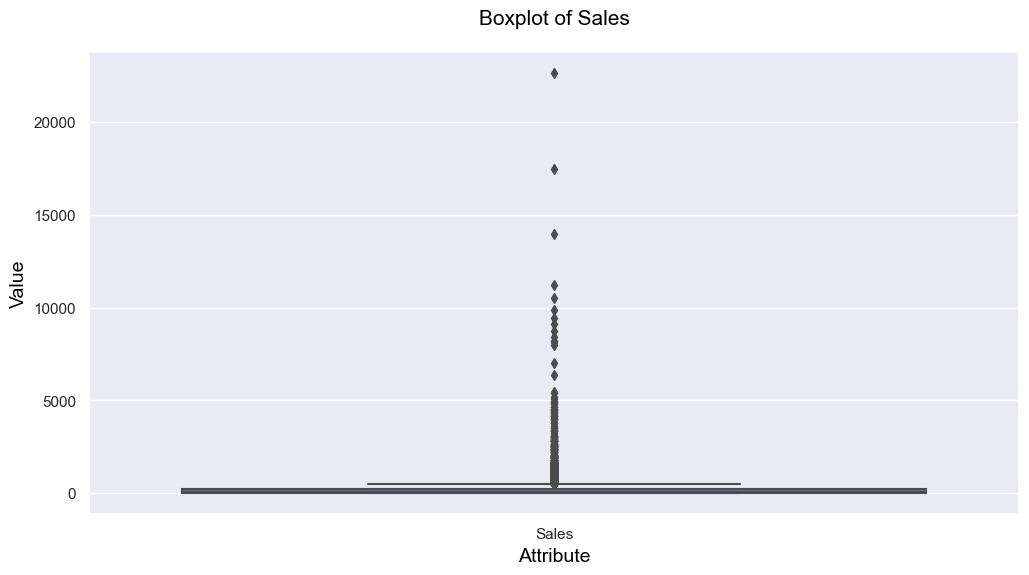

In [11]:
# Now we will treat the outlier in sales but I will like to view the outlier first.

# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sales[['Sales']])
plt.title('Boxplot of Sales', pad=20, fontsize=15, color='black')
plt.xlabel('Attribute', fontsize=14, color="black")
plt.ylabel('Value', fontsize=14, color="black")
plt.show()

In [12]:
# Removing outliers using Z-score
z_scores = zscore(df_sales[['Sales']])
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)
df_sales = df_sales[~outliers]

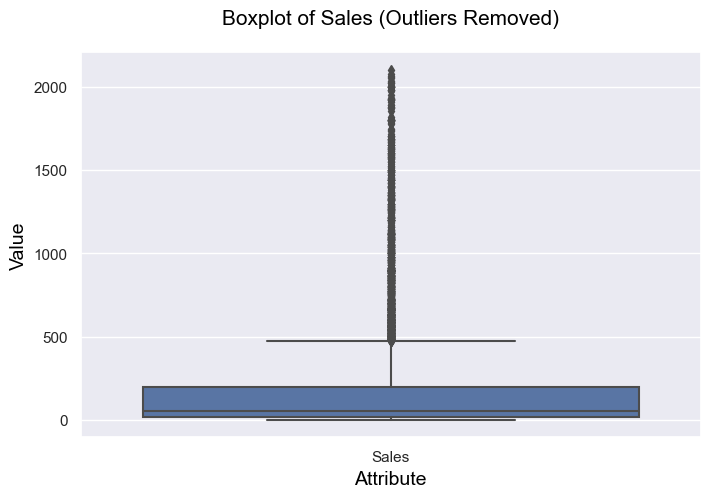

In [13]:
# Visualize outliers removed using box plots
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_sales[['Sales']])
plt.title('Boxplot of Sales (Outliers Removed)', pad=20, fontsize=15, color='black')
plt.xlabel('Attribute', fontsize=14, color="black")
plt.ylabel('Value', fontsize=14, color="black")
plt.show()

In [14]:
# Rectify outliers by capping
# Capping outliers in 'Sales'
sales_cap = df_sales['Sales'].quantile(0.95)
df_sales.loc[df_sales['Sales'] > sales_cap, 'Income'] = sales_cap

## Exploratory Analysis
* I want to explore the data through visualization to uncover patterns, spot anomalies, and test hypotheses with summary statistics and graphical representations.

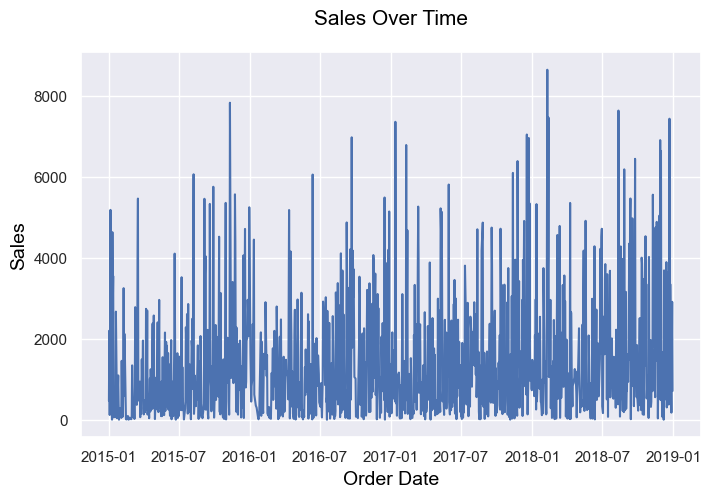

In [15]:
# Want to Visualize Sales over time

df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
sales_data = df_sales.groupby('Order Date')['Sales'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(8, 5))
plt.plot(sales_data['Order Date'], sales_data['Sales'])
plt.title('Sales Over Time', pad=20, fontsize=15, color='black')
plt.xlabel('Order Date', fontsize=14, color='black')
plt.ylabel('Sales', fontsize=14, color='black')
plt.show()

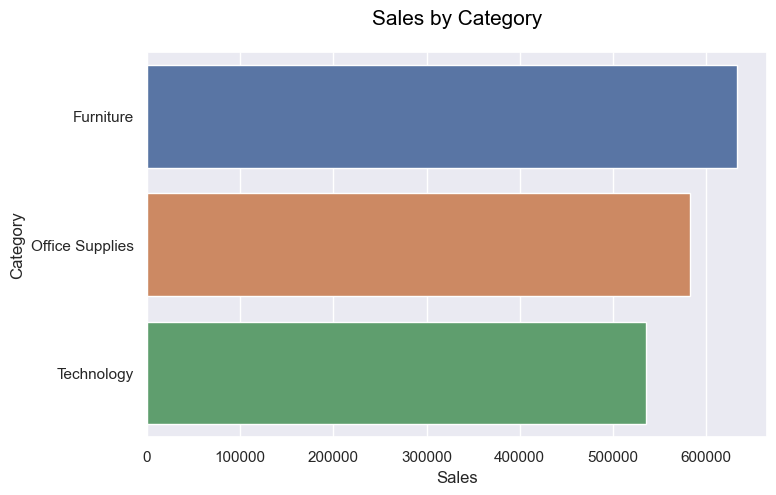

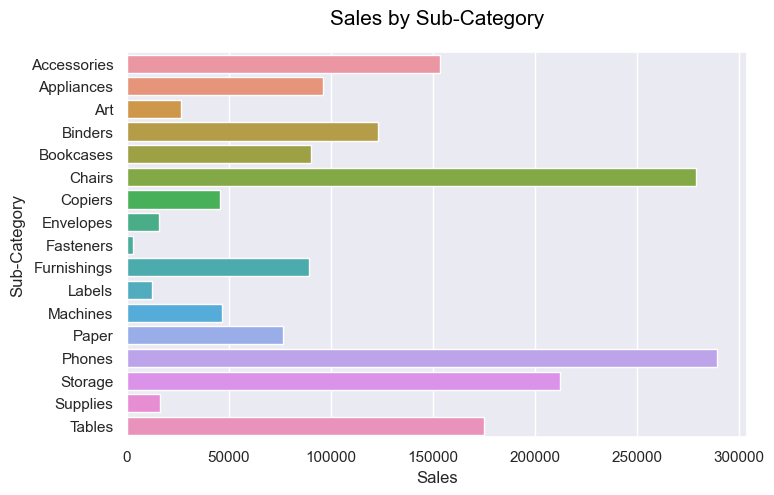

In [16]:
# Sales Distribution by Category and Sub-Category

category_sales = df_sales.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Category', data=category_sales)
plt.title('Sales by Category', pad=20, fontsize=15, color='black')
plt.show()

# Sales by sub-category
subcategory_sales = df_sales.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Sub-Category', data=subcategory_sales)
plt.title('Sales by Sub-Category', pad=20, fontsize=15, color='black')
plt.show()


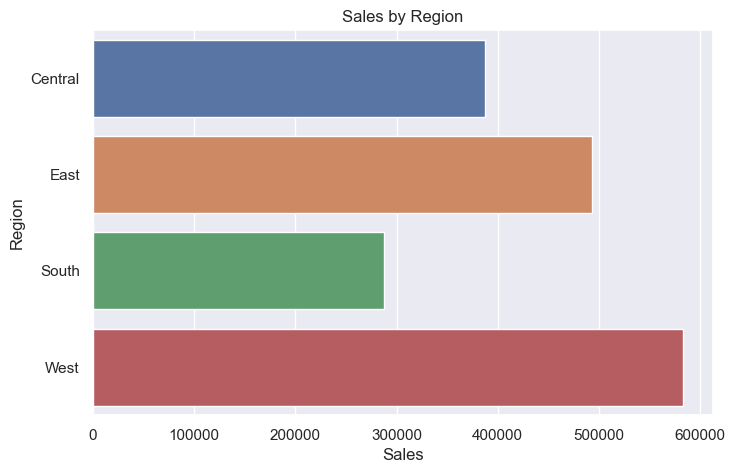

In [17]:
# Sales by Region

region_sales = df_sales.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Region', data=region_sales)
plt.title('Sales by Region')
plt.show()

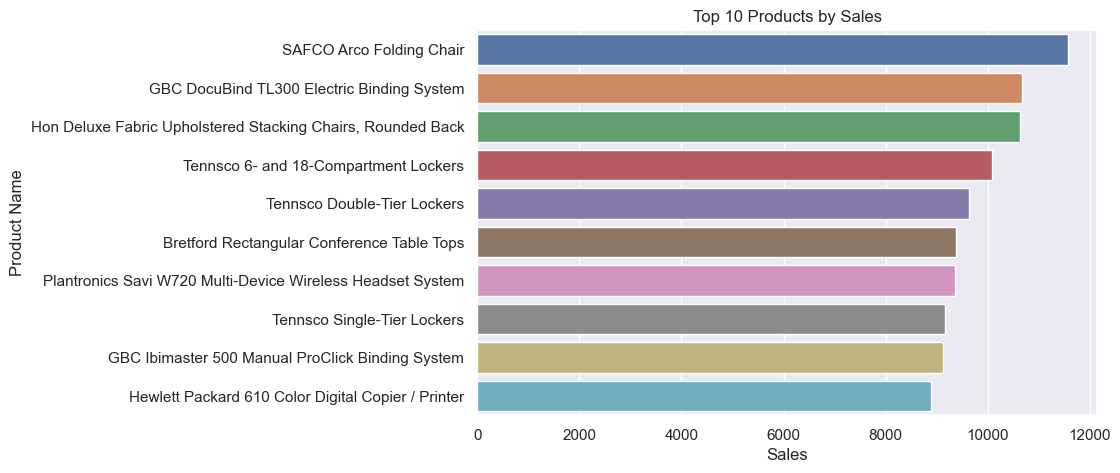

In [18]:
# Top 10 products by sales

top_products = df_sales.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales', y='Product Name', data=top_products)
plt.title('Top 10 Products by Sales')
plt.show()

# Time Series Analysis Preparation

In [19]:
# First I will create a new dataframe for Order Date and Sales for our Time Series Analysis

series_data = df_sales[['Order Date', 'Sales']].copy()

In [20]:
# Convert 'Order Date' to datetime
series_data['Date'] = pd.to_datetime(series_data['Order Date'])

# Drop the 'Order Date' column
series_data.drop(columns=['Order Date'], inplace=True)

In [21]:
# Reorder the columns so that 'Date' appears before 'Sales'
series_data = series_data[['Date', 'Sales']]

In [22]:
series_data.head()

,Date,Sales
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680


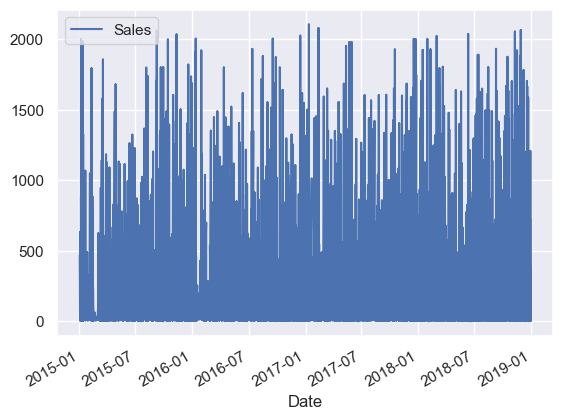

In [23]:
# Checking to see if it is stationary or not.

series_data.plot(x="Date", y="Sales");

In [24]:
# ADF test
result = adfuller(series_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -97.8007208374778
p-value: 0.0
Critical Values: {'1%': -3.4310267057161905, '5%': -2.8618390625345294, '10%': -2.5669291858686374}
The time series is stationary.


** Our p-value is less than 0.05, the null hypothesis of a unit root is rejected, indicating that the series is stationary.
** From the ADF results and our graph, we see that our time series is stationary, so we can use ARMA model


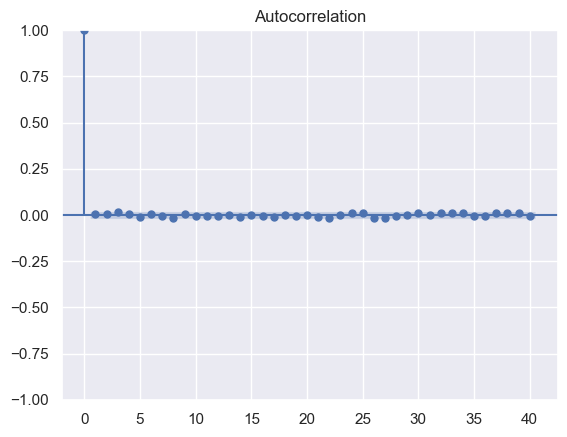

In [25]:
plot_acf(series_data["Sales"])
plt.show()

* Lag 1 in ACF: Suggests the presence of an MA(1) term

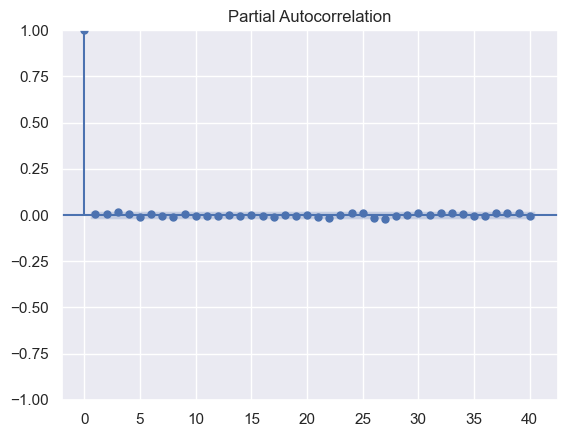

In [26]:
plot_pacf(series_data["Sales"])
plt.show()

* Lag 1 in PACF: Suggests the presence of an AR(1) term

** Both AR and MA is 1, This is common in time series data where the series exhibits both immediate past value dependency and short-term shock effects.

In [31]:
arma_model = SARIMAX(series_data["Sales"], order=(1, 0, 1)).fit()

In [32]:
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 9667
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -69033.785
Date:                Sat, 25 May 2024   AIC                         138073.571
Time:                        01:57:04   BIC                         138095.100
Sample:                             0   HQIC                        138080.870
                               - 9667                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   4.71e-06   2.12e+05      0.000       1.000       1.000
ma.L1         -0.9993      0.001  -1687.618      0.000      -1.000      -0.998
sigma2      9.329e+04   2.81e-10   3.32e+14      0.000    9.33e+04    9.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):             55013.29
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             2.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+28. Standard errors may be unstable.
"""

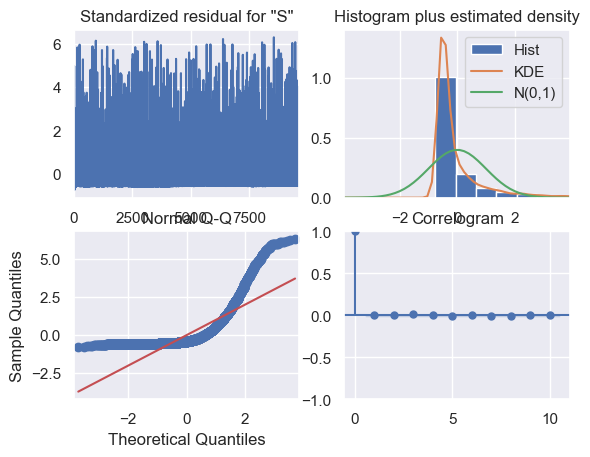

In [33]:
arma_model.plot_diagnostics()
plt.show()

In [34]:
forecast = arma_model.get_forecast(steps=10)

In [35]:
series_data.iloc[-50]

Date     2017-04-03 00:00:00
Sales                 159.98
Name: 9749, dtype: object

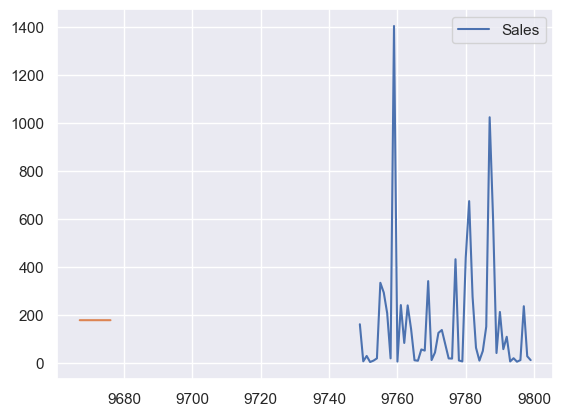

In [35]:
series_data.iloc[-100:].plot(y="Sales")
forecast.predicted_mean.plot();

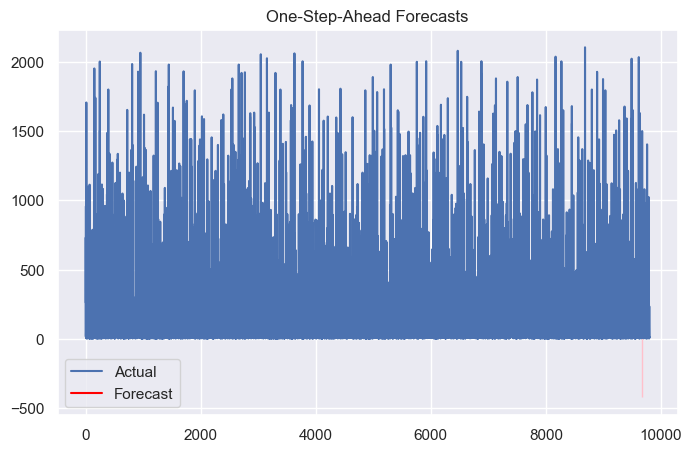

Forecast Errors: 9667   NaN
9668   NaN
9669   NaN
9670   NaN
9671   NaN
9672   NaN
9673   NaN
9674   NaN
9675   NaN
9676   NaN
9798   NaN
9799   NaN
dtype: float64


In [36]:
# Forecast the next 10 steps
forecast = arma_model.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(8, 5))
plt.plot(series_data.index, series_data['Sales'], label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title('One-Step-Ahead Forecasts')
plt.legend()
plt.show()

# Calculate forecast errors
actual = series_data['Sales'][-2:]
forecast_errors = actual - forecast_mean
print('Forecast Errors:', forecast_errors)


In [37]:
forecast.predicted_mean

9667    176.937965
9668    176.937460
9669    176.936955
9670    176.936450
9671    176.935945
9672    176.935440
9673    176.934935
9674    176.934430
9675    176.933925
9676    176.933419
Name: predicted_mean, dtype: float64

In [38]:
arma_model.aic

138073.5705735767

In [40]:
aicValues = []

for p in range(6):
    for q in range(6):
        aicValues.append([SARIMAX(series_data["Sales"], order=(p, 0, q), enforce_stationarity=False, enforce_invertibility=False).fit().aic, p, q])
print(aicValues)

[[140960.20462396307, 0, 0], [140447.3470605479, 0, 1], [140154.6290330476, 0, 2], [139886.30929590247, 0, 3], [139703.03382217765, 0, 4], [139592.71386996473, 0, 5], [140262.47069684725, 1, 0], [138145.99815339863, 1, 1], [138121.56762178824, 1, 2], [138094.68301439536, 1, 3], [138032.96884488588, 1, 4], [138108.01669040613, 1, 5], [139822.91164871684, 2, 0], [138147.7643965107, 2, 1], [138084.90766262024, 2, 2], [138068.39437039185, 2, 3], [138058.3070686817, 2, 4], [138005.71610048076, 2, 5], [139476.6882047234, 3, 0], [138135.01004560414, 3, 1], [138133.58227734859, 3, 2], [138039.6451128873, 3, 3], [138026.03230153568, 3, 4], [138020.46747348682, 3, 5], [139252.3222804156, 4, 0], [138312.062265098, 4, 1], [138172.4492822197, 4, 2], [138042.05868150652, 4, 3], [138020.35968841356, 4, 4], [138008.55150147987, 4, 5], [139121.71818980793, 5, 0], [138109.51053734517, 5, 1], [138061.14160408694, 5, 2], [138061.88993790952, 5, 3], [138032.75786492115, 5, 4], [138018.23494632865, 5, 5]]


In [41]:
aicValues.sort()

In [42]:
aicValues

[[138005.71610048076, 2, 5],
 [138008.55150147987, 4, 5],
 [138018.23494632865, 5, 5],
 [138020.35968841356, 4, 4],
 [138020.46747348682, 3, 5],
 [138026.03230153568, 3, 4],
 [138032.75786492115, 5, 4],
 [138032.96884488588, 1, 4],
 [138039.6451128873, 3, 3],
 [138042.05868150652, 4, 3],
 [138058.3070686817, 2, 4],
 [138061.14160408694, 5, 2],
 [138061.88993790952, 5, 3],
 [138068.39437039185, 2, 3],
 [138084.90766262024, 2, 2],
 [138094.68301439536, 1, 3],
 [138108.01669040613, 1, 5],
 [138109.51053734517, 5, 1],
 [138121.56762178824, 1, 2],
 [138133.58227734859, 3, 2],
 [138135.01004560414, 3, 1],
 [138145.99815339863, 1, 1],
 [138147.7643965107, 2, 1],
 [138172.4492822197, 4, 2],
 [138312.062265098, 4, 1],
 [139121.71818980793, 5, 0],
 [139252.3222804156, 4, 0],
 [139476.6882047234, 3, 0],
 [139592.71386996473, 0, 5],
 [139703.03382217765, 0, 4],
 [139822.91164871684, 2, 0],
 [139886.30929590247, 0, 3],
 [140154.6290330476, 0, 2],
 [140262.47069684725, 1, 0],
 [140447.3470605479, 0,

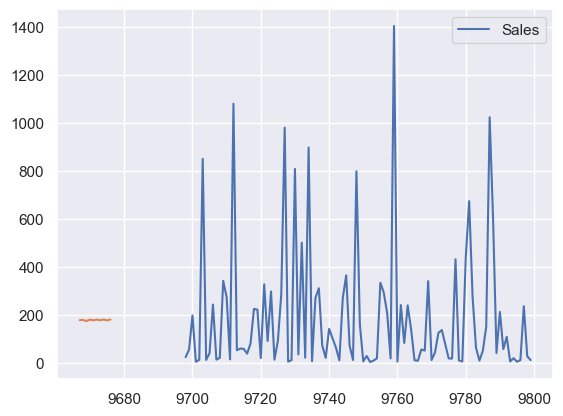

In [46]:
arma_model = SARIMAX(series_data["Sales"], order=(2, 0, 5)).fit()
forecast = arma_model.get_forecast(steps=10)
series_data.iloc[-100:].plot(y="Sales")
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_mean.plot();

In [47]:
adfuller(series_data["Sales"])

(-97.8007208374778,
 0.0,
 0,
 9666,
 {'1%': -3.4310267057161905,
  '5%': -2.8618390625345294,
  '10%': -2.5669291858686374},
 137468.0534325849)

This is forcast is more better after using the best hyperparamater on our model.
But looking at the time series, it is stationary and even our Augmented Dickey-Fuller test  confirme that the P value is less than 0.05, which means it is stationary.
However, there might be a seasonality in our time series as the sales pattern shows seasonality trend.
But if we look at the thresholds of the level of significant, the test statistics need to be smaller than percentage value in order to be considered significant and -97.8 is smaller than -3.43

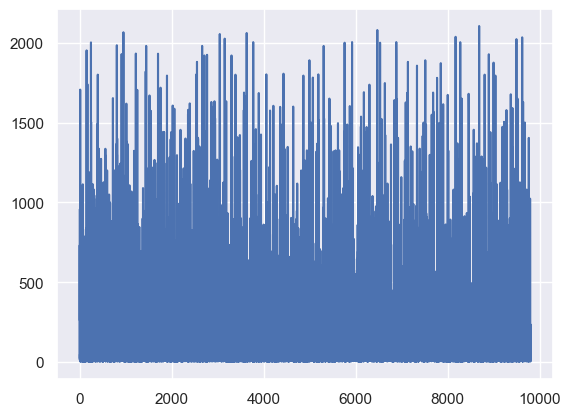

In [49]:
series_data["Sales"].plot();

In [50]:
series_data["Sales"].head(10)

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
5     48.8600
6      7.2800
7    907.1520
8     18.5040
9    114.9000
Name: Sales, dtype: float64

In [ ]:
series_data["Sales"].diff()[:10]

<Axes: >

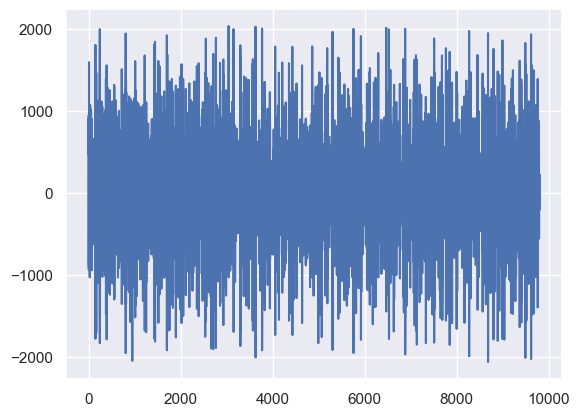

In [52]:
series_data["Sales"].diff().plot()

In [53]:
adfuller(series_data["Sales"].diff()[1:])

(-28.15523560499404,
 0.0,
 38,
 9627,
 {'1%': -3.431029447854447,
  '5%': -2.8618402742533235,
  '10%': -2.566929830869796},
 137739.55255601826)

I use both ARMA and SARIMA models to handle seasonality in my time series data. While ARMA models are suitable for stationary time series without seasonality, SARIMA models extend ARMA models to account for seasonality, making them suitable for time series data that exhibit seasonal patterns.
There is no need of differenciating (d) which is why we need ARIMA, we do not need ARIMA as I have testing to see that out time series is stationary and even tried to differentiate just to prove that the test hypothensis is still smaller -28.155 to -3.43 to show that without differenciating we have -97.8 is smaller than -3.43. I only showed the to prove that but I will go ahead to use SARIMA. Our time series is stationary according to the graph above it proves to be more stationary after the differential plotting, also the graph proves the differential is more stationary.
Since our forcast trend with this hyperparameter showed great trend arma_model = SARIMAX(series_data["Sales"], order=(2, 0, 5)).fit(). We will more to our SARIMA  for the seasonality treatment

# Data visualization

In [38]:
# pip install dash

In [99]:
import dash
import dash_core_components as dcc
from dash import Dash, html, dcc, callback, Output, Input
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

In [40]:
df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Income
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,NaN
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,NaN
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,841.094
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,NaN


In [42]:
# Drop income column
df_sales.drop(columns =['Income'], inplace=True)

In [89]:
df_sales['Postal Code'] = df_sales['Postal Code'].astype(int)

In [95]:
# Define the mapping from state names to state codes
state_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Map the state names to state codes
df_sales['Code'] = df_sales['State'].map(state_to_code)

In [97]:
# Drop State Code column
df_sales.drop(columns =['State Code'], inplace=True)

In [98]:
df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month Year,Year,Code
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08,2017,KY
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08,2017,KY
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12,2017,CA
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11,2016,FL
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-11,2016,FL


In [71]:
# Convert 'Order Date' to datetime format 
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])

# Extract month and year from 'Order Date' 
df_sales['Year'] = df_sales['Order Date'].dt.year

# Now group by 'Month Year' and will aggregate the sales
yearly_sales = df_sales.groupby('Year')['Sales'].sum().reset_index()

# Convert 'Year' column to numeric format
yearly_sales['Year'] = pd.to_numeric(yearly_sales['Year'], errors='coerce')

# Aggregate data by product
top_products = df_sales.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

# Aggregate data by state
state_sales = df_sales.groupby('State')['Sales'].sum().reset_index()

# Aggregate data by country
country_sales = df_sales.groupby('Country')['Sales'].sum().reset_index()

In [78]:
df_sales["Year"].unique()

array([2017, 2016, 2015, 2018], dtype=int64)

In [129]:
# 'Year' is not datetime-like, let's convert it
df_sales['Year'] = pd.to_datetime(df_sales['Year'], format='%Y')

In [101]:
fig = go.Figure(
          data=go.Choropleth(
          locations=df_sales["Code"],
          z = df_sales["Sales"].astype(int),
          locationmode="USA-states",
          colorscale="Greens",
          colorbar_title="Sales"
          )
)
fig.update_layout(
title_text="US Sales by State",
    geo_scope="usa")
fig.show()

In [142]:
# Layout for the customer segmentation dashboard
customer_segmentation_layout = html.Div([
    html.H1('Customer Segmentation Dashboard'),
    
    # Pie chart for customer distribution by demographics
    dcc.Graph(id='customer-demographics', figure=px.pie(df_sales, names='Segment', title='Customer Distribution by Segment')),
    
    # Bar chart for customer distribution by location
    dcc.Graph(id='customer-location', figure=px.bar(df_sales.groupby('Region').size().reset_index(name='Customer Count'), x='Region', y='Customer Count', title='Customer Distribution by Region'))
])

# Figure for geospatial visualization
fig = go.Figure(
    data=go.Choropleth(
        locations=df_sales["Code"],
        z=df_sales["Sales"],  # Use the original sales values for coloring the map
        locationmode="USA-states",
        colorscale="blues",
        colorbar_title="Sales (USD)",
        hovertemplate='<b>%{location}</b><br>Sales: %{z:.2f} USD<br>',  # Define hover tooltip with USD format
    )
)
fig.update_layout(
    title_text="US Sales by State",
    geo_scope="usa"
)

#  Dash app
app = dash.Dash(__name__)

# Dashboard layout
app.layout = html.Div([
    html.H1('Online Retail Dashboard for Young Adults (18 - 35 years)'),
    
    # Summary Cards
    html.Div([
        html.Div([
            html.H3('Total Sales'),
            html.P(f"${df_sales['Sales'].sum():,.2f}"),
            html.P("The total sales amount provides an overview of the overall revenue generated by the online retail business."),
        ], className='summary-card'),
        html.Div([
            html.H3('Average Order Value'),
            html.P(f"${df_sales['Sales'].mean():,.2f}"),
            html.P("The average order value represents the typical amount spent by customers per transaction, which is valuable for understanding customer behavior and setting pricing strategies."),
        ], className='summary-card'),
        html.Div([
            html.H3('Number of Customers'),
            html.P(f"{df_sales['Customer ID'].nunique() if 'Customer ID' in df_sales else 'N/A'}"),
            html.P("The number of unique customers indicates the size of the customer base, which is essential for market analysis and customer segmentation."),
        ], className='summary-card'),
    ], className='summary-container'),
    
    # Geospatial Visualization
    dcc.Graph(id='map', figure=fig),
    html.P("The geospatial visualization illustrates the distribution of sales by state. It allows us to identify regions with high sales volumes and potential areas for market expansion or targeted marketing campaigns."),
    
    dcc.Tabs([
        dcc.Tab(label='Sales Over Time', children=[
            dcc.Graph(id='sales-over-time', 
                      figure=px.line(df_sales.groupby('Year')['Sales'].sum().reset_index(), x='Year', y='Sales', title='Yearly Sales'))
        ]),
        
        dcc.Tab(label='Top Products', children=[
            dcc.Graph(id='top-products', 
                      figure=px.bar(df_sales.groupby('Product Name')['Sales'].sum().reset_index().nlargest(10, 'Sales'), x='Product Name', y='Sales', title='Top Selling Products'))
        ]),
        
        dcc.Tab(label='Customer Segmentation', children=[
            customer_segmentation_layout
        ])
    ]),
    
    # Machine Learning Insights
    html.Div([
        html.H2('Machine Learning Insights'),
        html.P("Machine learning models can be used to predict future sales trends, segment customers based on demographics, and provide personalized product recommendations."),
        html.P("This dataset is suitable for machine learning models due to its rich features such as sales data, customer demographics, and product information. By leveraging machine learning algorithms, businesses can gain valuable insights into customer behavior and market trends, leading to better decision-making and improved business performance."),
    ], className='ml-insights'),
    
], className='container')

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
